In [1]:
import turicreate as tc
import pandas as pd
import numpy as np

In [2]:
mw = tc.load_sframe('../binarydata/funcs-encoded')
mw.remove_column('fcount', inplace=True)

apk,function
5868,124151
38,205926
3965,412019
4227,455698
8365,89728
16611,673605
17213,507119
33,204076
497,342467
8526,204076


In [ ]:
apks = mw['apk'].unique()
k = apks.shape[0]

In [5]:
sim_recom = tc.item_similarity_recommender.create(mw, user_id='function', item_id='apk', similarity_type='jaccard', 
                                                  only_top_k=k, threshold=0.0, verbose=False)

In [6]:
items = sim_recom.get_similar_items(apks, k=k)

In [8]:
items.head()

apk,similar,score,rank
21855,804,0.44979554414749146,1
21855,3977,0.42904841899871826,2
21855,9141,0.3600617051124573,3
21855,16802,0.22550606727600098,4
21855,3610,0.20764803886413574,5
21855,24303,0.20415878295898438,6
21855,22561,0.18196511268615723,7
21855,2422,0.1654706597328186,8
21855,27588,0.1622059941291809,9
21855,2903,0.16173487901687622,10


In [7]:
a = 8200
b = 11365

In [9]:
def d(a, b, items):
    return items[(items['apk']==a)&(items['similar']==b)]

In [11]:
d(a, b, items)

apk,similar,score,rank
8200,11365,0.1666666865348816,1800


In [13]:
rel = mw[(mw['apk']==a)|(mw['apk']==b)]

In [14]:
rel.materialize()

In [18]:
rel

apk,function
8200,178583
11365,207973
11365,101925
11365,178583
8200,101925
11365,342566
11365,65996


In [19]:
a_funcs = set(rel[rel['apk']==a]['function'])
b_funcs = set(rel[rel['apk']==b]['function'])

In [20]:
a_funcs, b_funcs

({101925, 178583}, {65996, 101925, 178583, 207973, 342566})

In [23]:
len(a_funcs.intersection(b_funcs))/len(a_funcs.union(b_funcs))

0.4

In [24]:
sim_recom_s = tc.item_similarity_recommender.create(rel, user_id='function', item_id='apk', similarity_type='jaccard', 
                                                  only_top_k=k, threshold=0.0, verbose=False)

In [27]:
items2 = sim_recom_s.get_similar_items([a,b], k=k)

In [28]:
items2

apk,similar,score,rank
8200,11365,0.3999999761581421,1
11365,8200,0.3999999761581421,1


In [30]:
i8 = sim_recom.get_similar_items([8200], k=k)

In [31]:
i8[i8['similar']==b]

apk,similar,score,rank
8200,11365,0.1666666865348816,1800


In [35]:
i8[(i8['rank']>1795)&(i8['rank']<1810)]

apk,similar,score,rank
8200,2419,0.1666666865348816,1796
8200,20049,0.1666666865348816,1797
8200,11861,0.1666666865348816,1798
8200,6570,0.1666666865348816,1799
8200,11365,0.1666666865348816,1800
8200,20390,0.1666666865348816,1801
8200,16605,0.1666666865348816,1802
8200,1101,0.1666666865348816,1803
8200,9446,0.1666666865348816,1804
8200,29,0.1666666865348816,1805


In [39]:
#seed_item_set_size = 0 
#nearest_neighbors_interaction_proportion_threshold = 0.9
#degree_approximation_threshold 
sim_recom = tc.item_similarity_recommender.create(mw, user_id='function', item_id='apk', similarity_type='jaccard', 
                                                  only_top_k=k,nearest_neighbors_interaction_proportion_threshold=1, threshold=0.0, verbose=False)
it = sim_recom.get_similar_items([a], k=k)
it[it['similar']==b]

apk,similar,score,rank
8200,11365,0.1666666865348816,1835


In [ ]:
m = pd.read_csv('../data/joined.csv', index_col='apn')
m['nf'] = m['nf'].apply(eval)

In [ ]:
def jaccard(apid1: int, apid2: int, funcs) -> float:
    p1 = funcs[apid1]
    p2 = funcs[apid2]

    return 1 - len(p1 & p2)/len(p1|p2)


distance = lambda x,y: jaccard(x, y, m['nf'])

In [49]:
sim_recom = tc.item_similarity_recommender.create(mw, 
                                                  user_id='function', 
                                                  item_id='apk', 
                                                  similarity_type='jaccard', 
                                                  only_top_k=k,
                                                  threshold=0.0, verbose=False)
similars = sim_recom.get_similar_items(apks, k=k)

def tc_dist(a, b, similars):
    res = similars[(similars['apk']==a)&(similars['similar']==b)]['score']
    return res

In [50]:
tc_dist(a, b, similars)

dtype: float
Rows: ?
[0.004075109958648682, ... ]

In [112]:
import random
import matplotlib.pyplot as plt

In [104]:
pairs = list()
for _ in range(1000):
    (a, b) = random.choices(apks, k=2)
    pairs.append((a,b))

In [105]:
st, en = list(zip(*pairs))

In [106]:
similars = sim_recom.get_similar_items(list(en), k=k)

In [107]:
dsts = list()
for (a,b) in pairs:
    dis = similars[(similars['apk']==b)&(similars['similar']==a)]
    d = distance(a, b)
    if any(dis):
        dsts.append((a,b, 1-dis[0]['score'],d, dis[0]['rank']))

In [108]:
df = pd.DataFrame(dsts, columns=['a', 'b', 'dist_tc', 'dist_pd', 'rank'])

In [109]:
df

,a,b,dist_tc,dist_pd,rank
0,18980,21351,0.763442,0.763094,1428
1,13746,4893,0.995302,0.995187,4829
2,1746,20603,0.999473,0.999341,6935
3,8364,2620,0.999741,0.999483,5176
4,26009,15227,0.998024,0.997694,6943
...,...,...,...,...,...
700,27069,27490,0.992806,0.992806,1904
701,3352,19597,0.998598,0.997895,3344
702,8380,11665,0.998807,0.998541,6505
703,23621,7336,0.000000,0.000000,97


In [110]:
df['err'] = df.apply(lambda x: (x[3] - x[2])**2, axis=1)

In [111]:
df.sort_values(by='err')

,a,b,dist_tc,dist_pd,rank,err
267,27580,14066,0.000000,0.0000,444,0.000000
603,8774,4199,0.937500,0.9375,2371,0.000000
32,25154,20942,0.000000,0.0000,482,0.000000
376,15893,22888,0.500000,0.5000,474,0.000000
36,22113,881,0.000000,0.0000,427,0.000000
...,...,...,...,...,...,...
258,21449,13225,0.666667,0.0000,738,0.444444
432,26148,25105,0.666667,0.0000,873,0.444444
606,4524,8569,0.666667,0.0000,1469,0.444444
637,6027,3310,0.666667,0.0000,1339,0.444444


In [116]:
errs = df.sort_values(by='err')['err']

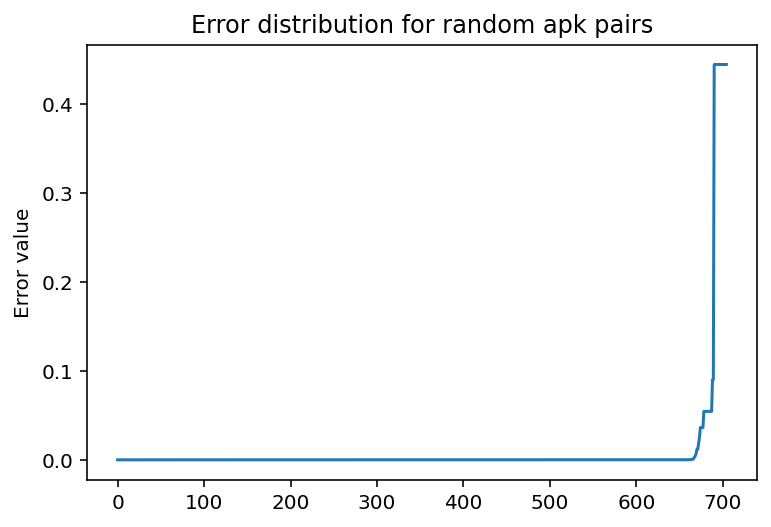

In [128]:
plt.title('Error distribution for random apk pairs')
plt.plot(range(0, len(errs)), errs)
plt.ylabel('Error value');